## Importing required libraries

In [2]:
import sys
assert sys.version_info >= (3, 5)
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import tarfile
import urllib
# import cv2

## Load the data

In [3]:
def load_csv():
    return pd.read_csv('Video_Games_Sales.csv')

## Accessing the dataframe

In [4]:
df = load_csv()
df.head()
# Number of Attributes in the Dataset: 16 Attributes
# NAME- Name of the video Game
# PLATFORM- Console on which the game is available
# YEAR_OF_RELEASE- Year in which it was released
# GENRE- Game's Category
# PUBLISHER- The company under which the game has been released
# NA_SALES- Game sales in North America (in millions of units)
# EU SALES- Game sales in European Union (in millions of units)
# JP_SALES- Game sales in Japan (in millions of units)
# OTHER_SALES- Game sales in the rest of the world, i.e. Africa, Asia 
# excluding Japan,Europe excluding the E.U. 
# GLOBAL_SALES- Total sales in the world (in millions of units)
# CRITIC_SCORE- Average Score given by professional critics
# CRITIC_COUNT- Number of Critics that Scored the game
# USER_SCORE- Average Score given by users
# USER_COUNT- Number of Users that Scored the game
# DEVELOPER- Developing company of the game 
# RATING- Suitable target audience rating; E(Everyone), E10+(Everyone 10+), T(Teen 13+), M(Mature +17)
#

,Name,Platform,Platform_Identifier,Year_of_Release,Genre,Genre_Identifier,Publisher,Publisher_Identifier,NA_Sales,EU_Sales,...,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Rating_Identifier,Sales_Category,Sales_Category_Identifier
0,Mario Kart Wii,Wii,7,2008,Racing,5,Nintendo,156,15.68,12.76,...,82,73,8.3,709,Nintendo,1264,E,1,VERY HIGH,4
1,Wii Sports Resort,Wii,7,2009,Sports,2,Nintendo,156,15.61,10.93,...,80,73,8.0,192,Nintendo,1264,E,1,VERY HIGH,4
2,New Super Mario Bros.,DS,11,2006,Platform,6,Nintendo,156,11.28,9.14,...,89,65,8.5,431,Nintendo,1264,E,1,VERY HIGH,4
3,Wii Play,Wii,7,2006,Misc,7,Nintendo,156,13.96,9.18,...,58,41,6.6,129,Nintendo,1264,E,1,VERY HIGH,4
4,New Super Mario Bros. Wii,Wii,7,2009,Platform,6,Nintendo,156,14.44,6.94,...,87,80,8.4,594,Nintendo,1264,E,1,VERY HIGH,4


## Get information about the dataframe

In [5]:
df.info()
# Year_of_Release has 78 missing values
# Publisher has 4 missing values
# Developer has 4 missing values
# Rating has 70 missing
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6866 non-null   object 
 1   Platform                   6866 non-null   object 
 2   Platform_Identifier        6866 non-null   int64  
 3   Year_of_Release            6866 non-null   int64  
 4   Genre                      6866 non-null   object 
 5   Genre_Identifier           6866 non-null   int64  
 6   Publisher                  6866 non-null   object 
 7   Publisher_Identifier       6866 non-null   int64  
 8   NA_Sales                   6866 non-null   float64
 9   EU_Sales                   6866 non-null   float64
 10  JP_Sales                   6866 non-null   float64
 11  Other_Sales                6866 non-null   float64
 12  Global_Sales               6866 non-null   float64
 13  Critic_Score               6866 non-null   int64

In [6]:
df["Genre"].value_counts()
# The value-counts() method gives the count of each catagory present in the attribute

Action          1644
Sports           956
Shooter          867
Role-Playing     713
Racing           585
Platform         403
Misc             388
Fighting         379
Simulation       297
Strategy         268
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [7]:
df["Year_of_Release"].value_counts()

2008    597
2007    596
2005    566
2009    551
2006    529
2003    504
2004    479
2011    461
2002    459
2010    431
2012    313
2013    267
2001    257
2014    253
2016    212
2015    211
2000    102
1999     30
1998     25
1997     13
1996      6
1994      1
1985      1
1992      1
1988      1
Name: Year_of_Release, dtype: int64

In [8]:
df.describe()

,Platform_Identifier,Year_of_Release,Genre_Identifier,Publisher_Identifier,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer_Identifier,Rating_Identifier,Sales_Category_Identifier
count,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000
mean,8.588552,2007.433294,4.310661,119.051267,0.390029,0.232552,0.063386,0.081736,0.767878,70.315322,28.922808,7.187678,174.163997,638.463152,1.137198,0.625546
std,5.496747,4.204876,3.132294,73.344464,0.830170,0.591932,0.283346,0.249653,1.692669,13.863460,19.217091,1.438165,586.032776,370.504852,1.045279,0.950354
min,0.000000,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000,0.000000
25%,3.000000,2004.000000,2.000000,41.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000,321.000000,0.000000,0.000000
50%,10.000000,2007.000000,3.000000,126.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000,618.000000,1.000000,0.000000
75%,14.000000,2010.750000,6.000000,168.000000,0.400000,0.210000,0.010000,0.070000,0.760000,81.000000,39.000000,8.200000,88.000000,939.750000,2.000000,1.000000
max,16.000000,2016.000000,12.000000,261.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000,1289.000000,6.000000,4.000000


##  Visualizing Geographical Data

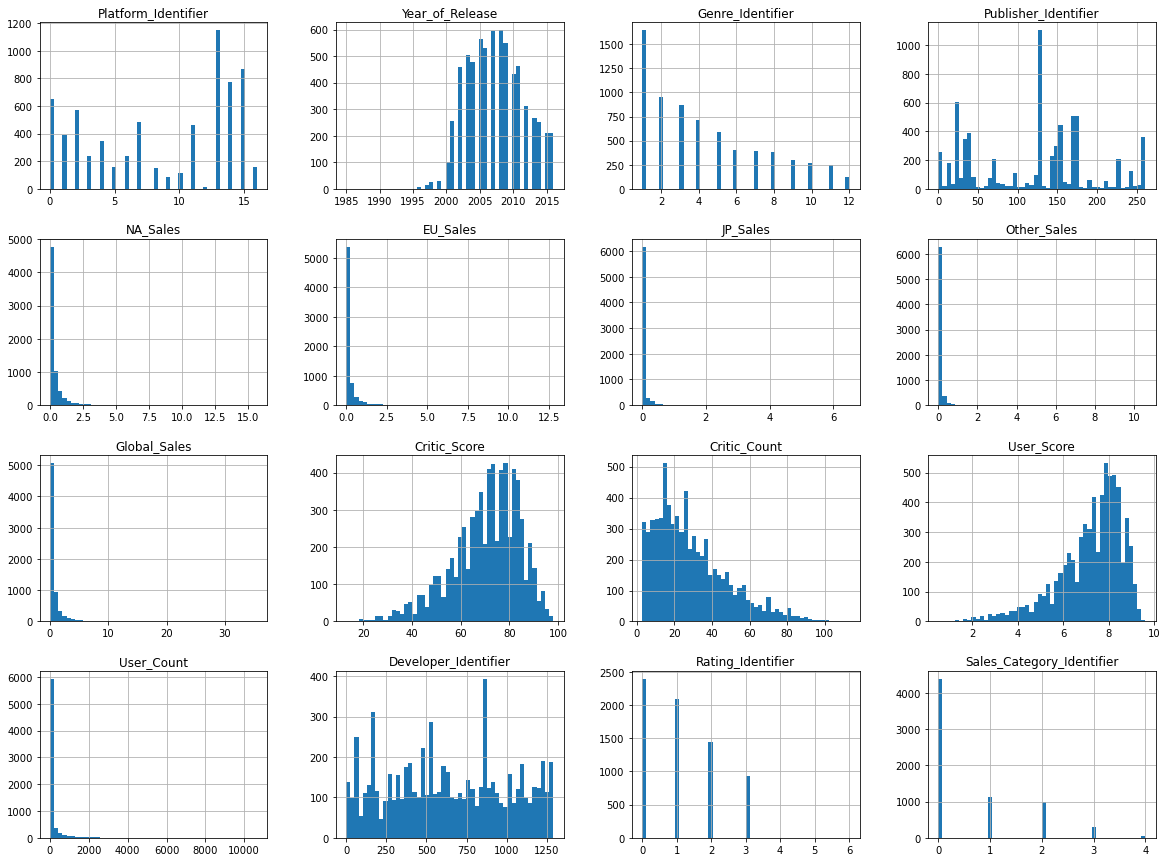

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()
# The year of release with the most unit sales is 2008 with 600 million units,
# followed by 2007 with 596 million units and 1988, 1985, 1992, 1994 with the lowest at 1 million units each
# 
#
#
#

<AxesSubplot:xlabel='NA_Sales', ylabel='Year_of_Release'>

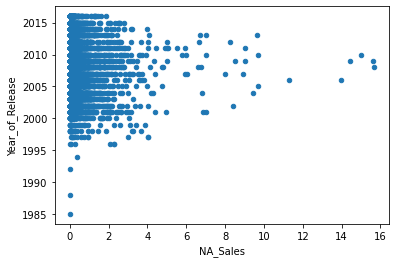

In [10]:
df.plot(kind="scatter", x="NA_Sales", y="Year_of_Release")

<AxesSubplot:xlabel='JP_Sales', ylabel='Genre'>

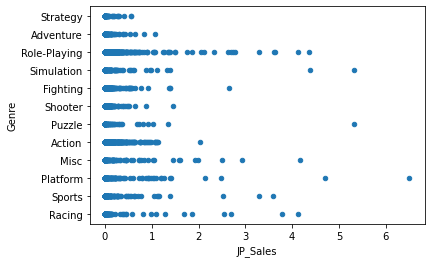

In [11]:
df.plot(kind="scatter", x="JP_Sales", y="Genre")

<AxesSubplot:xlabel='EU_Sales', ylabel='Genre'>

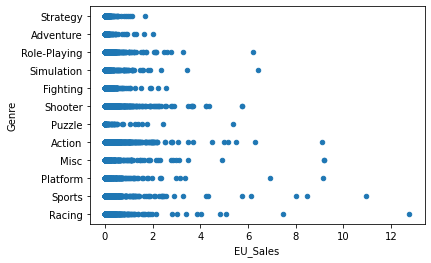

In [12]:
df.plot(kind="scatter", x="EU_Sales", y="Genre")

<AxesSubplot:xlabel='Other_Sales', ylabel='Genre'>

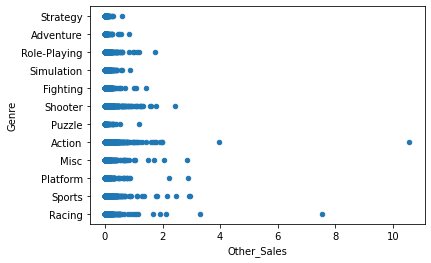

In [13]:
df.plot(kind="scatter", x="Other_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

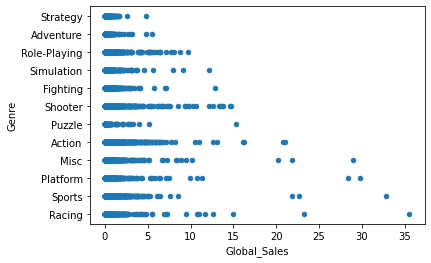

In [14]:
df.plot(kind="scatter", x="Global_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

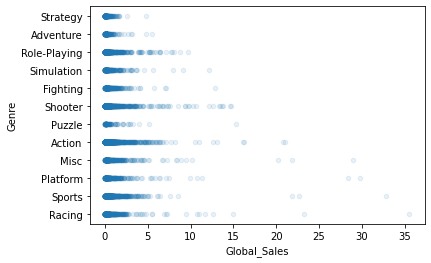

In [15]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.1)

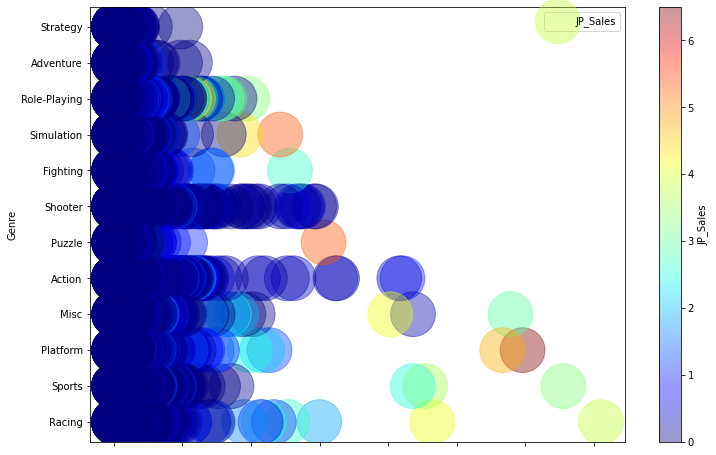

In [16]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.4,
    s=df["Year_of_Release"], label= "JP_Sales",figsize=(12,8),
    c="JP_Sales", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Top Ten Best Selling Games Regionally 

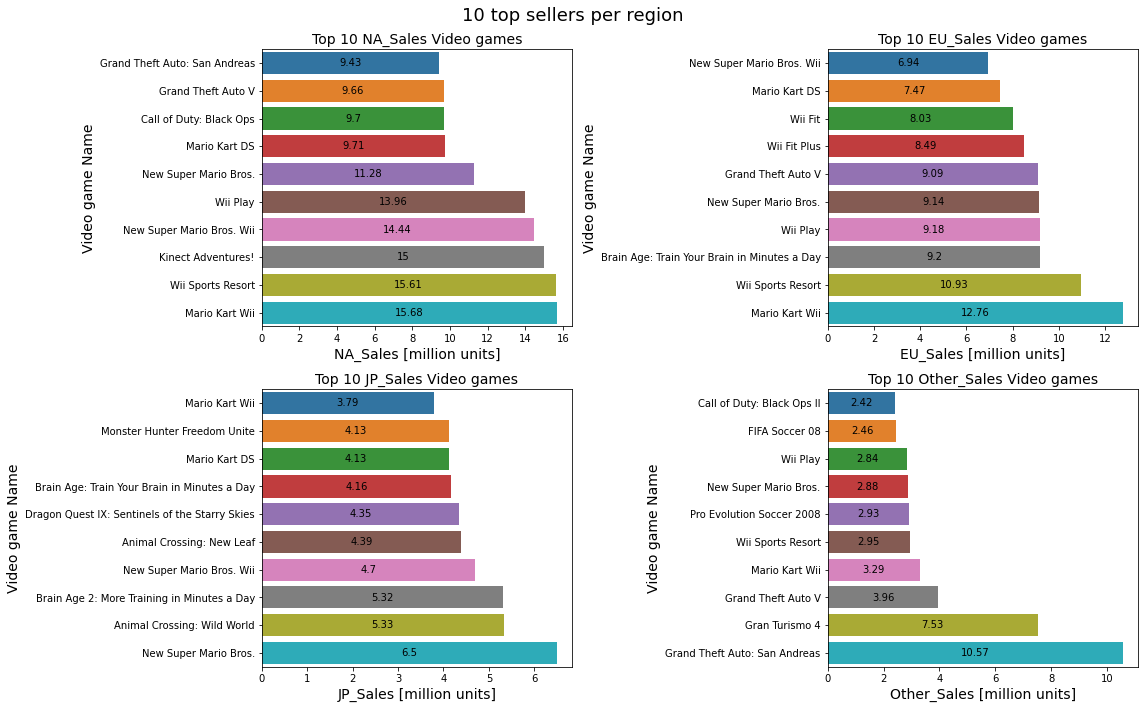

In [17]:
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig,axes = plt.subplots(int(len(sales_regions)/2),int(len(sales_regions)/2), figsize=(16,10))
axes = axes.ravel() #Required for array typing ???
for index, region in enumerate(sales_regions):
    data_sales_sort = df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Name'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Video game Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center')
    
plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

# Shayma's Done

# Code from "https://www.kaggle.com/code/baptisteadn/a-brief-analysis-of-video-games-sales/notebook"

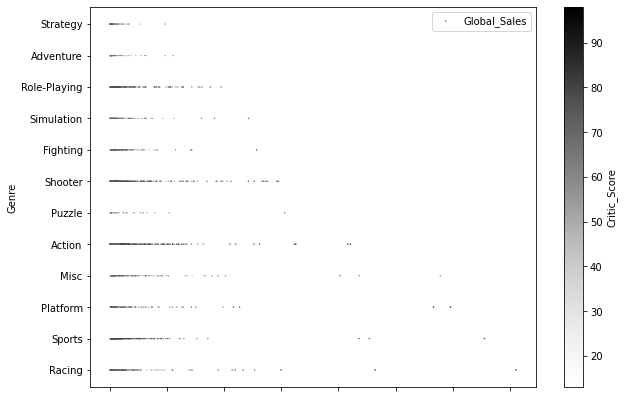

In [18]:
df.plot(kind="scatter", x="Global_Sales", y="Genre",
    s=df["Global_Sales"]/100, label="Global_Sales", figsize=(10,7),
    c="Critic_Score", colorbar=True,
)
plt.legend()

## Correlation matrix

In [19]:
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [20]:
corr_matrix["Global_Sales"].sort_values(ascending=False)

Global_Sales                 1.000000
NA_Sales                     0.940083
EU_Sales                     0.917816
Other_Sales                  0.768389
Sales_Category_Identifier    0.657346
JP_Sales                     0.625765
Critic_Count                 0.326943
User_Count                   0.303213
Critic_Score                 0.272540
Platform_Identifier          0.117541
User_Score                   0.098111
Developer_Identifier         0.072204
Rating_Identifier            0.035787
Year_of_Release              0.009786
Publisher_Identifier        -0.015400
Genre_Identifier            -0.041476
Name: Global_Sales, dtype: float64

## Scatter Matrix

array([[<AxesSubplot:xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='JP_Sales'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Genre_Identifier'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Genre

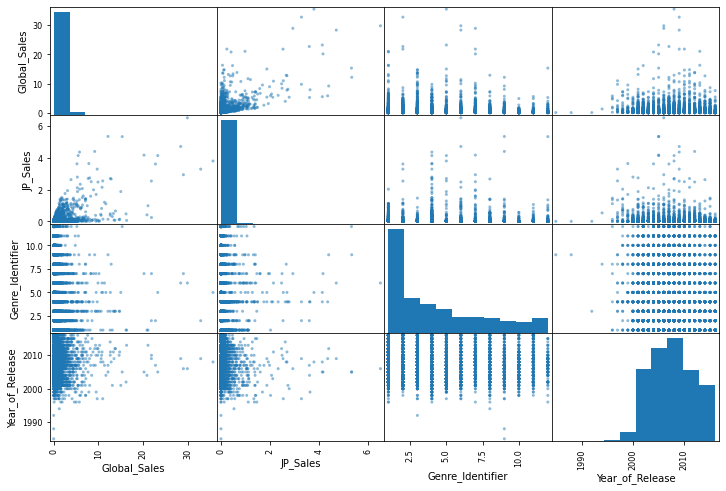

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Global_Sales", "JP_Sales", "Genre_Identifier", "Year_of_Release"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

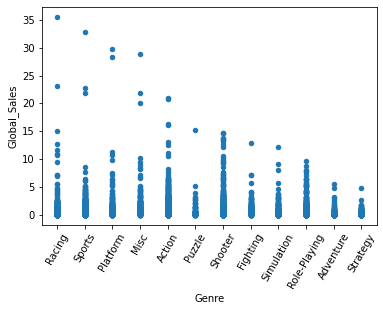

In [22]:
df.plot(kind="scatter", x="Genre", y="Global_Sales")
plt.xticks(rotation=60)

array([[<AxesSubplot:xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Critic_Score'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Year_of_Release'>]],
      dtype=object)

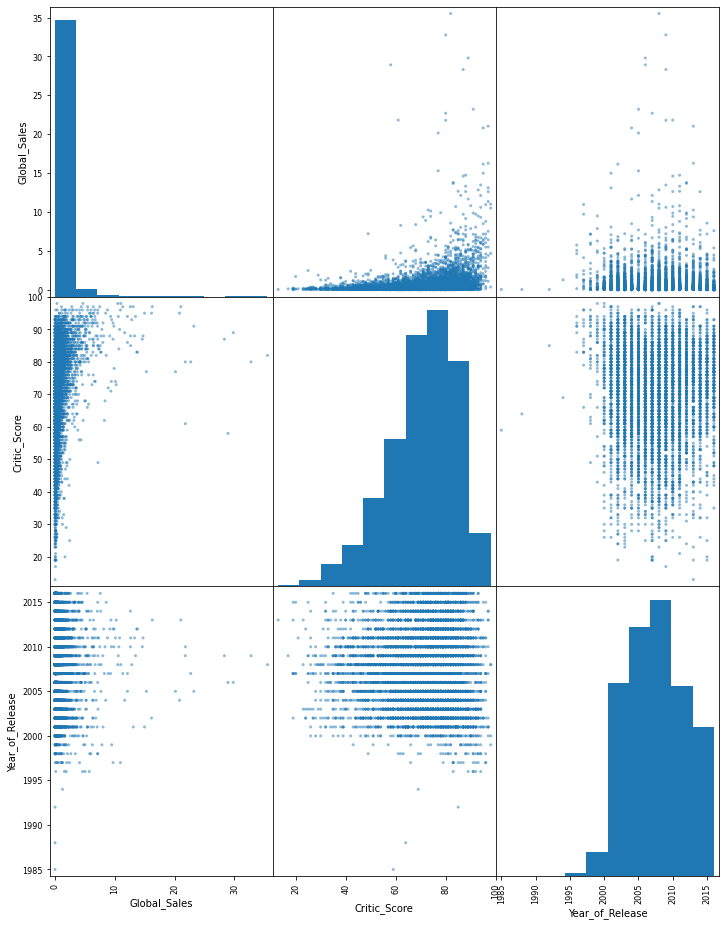

In [23]:
a=['Global_Sales', 'Critic_Score', 'Year_of_Release']
scatter_matrix(df[a], figsize=(12, 16))

## Data Cleaning

In [24]:
df[df.isnull().any(axis=1)]

,Name,Platform,Platform_Identifier,Year_of_Release,Genre,Genre_Identifier,Publisher,Publisher_Identifier,NA_Sales,EU_Sales,...,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Rating_Identifier,Sales_Category,Sales_Category_Identifier


In [25]:
df.dropna(subset=["Year_of_Release","Publisher","Developer","Rating"],inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6866 non-null   object 
 1   Platform                   6866 non-null   object 
 2   Platform_Identifier        6866 non-null   int64  
 3   Year_of_Release            6866 non-null   int64  
 4   Genre                      6866 non-null   object 
 5   Genre_Identifier           6866 non-null   int64  
 6   Publisher                  6866 non-null   object 
 7   Publisher_Identifier       6866 non-null   int64  
 8   NA_Sales                   6866 non-null   float64
 9   EU_Sales                   6866 non-null   float64
 10  JP_Sales                   6866 non-null   float64
 11  Other_Sales                6866 non-null   float64
 12  Global_Sales               6866 non-null   float64
 13  Critic_Score               6866 non-null   int64

In [27]:
df_head = df[["Genre"]]
df_head.head(10)

,Genre
0,Racing
1,Sports
2,Platform
3,Misc
4,Platform
5,Racing
6,Sports
7,Misc
8,Sports
9,Action


In [28]:
df["Developer_Identifier"]

0       1264
1       1264
2       1264
3       1264
4       1264
        ... 
6861     400
6862     280
6863    1070
6864    1136
6865     444
Name: Developer_Identifier, Length: 6866, dtype: int64

In [29]:
df["Global_Sales"].value_counts()

0.02     215
0.05     174
0.03     167
0.08     165
0.06     165
        ... 
4.63       1
4.67       1
4.68       1
4.76       1
35.52      1
Name: Global_Sales, Length: 537, dtype: int64

## Coverting string attributes to numerical values to calculate the correlation value.

### ALL THE PYTHON CODE HAS BEEN COMMENTED BECAUSE IT HAS TO BE RUN ONLY ONCE.

### Sales_Category_Identifier

In [30]:
# Catdictionary = {'VERY LOW': 0, 'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'VERY HIGH': 4}
# df.Sales_Category_Identifier = [Catdictionary[item] for item in df.Sales_Category_Identifier]

# df.Sales_Category_Identifier

In [31]:
# df["Sales_Category_Identifier"].value_counts()

### Ratings_Identifier

In [32]:
df["Rating"].value_counts()

T       2387
E       2097
M       1441
E10+     938
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

In [33]:
# Ratedictionary = {'T': 0, 'E': 1, 'M': 2, 'E10+': 3, 'AO': 4, 'K-A': 5, 'RP': 6}

# df.Rating_Identifier = [Ratedictionary[item] for item in df.Rating_Identifier]

# df.Rating_Identifier

### Publisher_Identifier

In [34]:
df["Publisher_Identifier"].value_counts()

126    954
168    497
176    494
34     316
41     307
      ... 
172      1
198      1
102      1
224      1
179      1
Name: Publisher_Identifier, Length: 262, dtype: int64

In [35]:
# setPublish = list(set(df["Publisher_Identifier"]))
# publisherDictionary = dict(zip(setPublish, range(262)))
# publisherDictionary

In [36]:
# df.Publisher_Identifier = [publisherDictionary[item] for item in df.Publisher_Identifier]

# df.Publisher_Identifier

### Platform_Identifier

In [37]:
df["Platform_Identifier"].value_counts()

13    1149
15     865
14     774
0      652
2      571
7      485
11     465
1      392
4      350
3      239
6      238
5      159
16     155
8      151
10     118
9       89
12      14
Name: Platform_Identifier, dtype: int64

In [38]:
# setPlatform = list(set(df["Platform_Identifier"]))
# PlatformDictionary = dict(zip(setPlatform, range(17)))
# PlatformDictionary

In [39]:
# df.Platform_Identifier = [PlatformDictionary[item] for item in df.Platform_Identifier]

# df.Platform_Identifier

### Developer_Identifier

In [40]:

# setdev = list(set(df["Developer_Identifier"]))

# for i in range(1290):
#     setdev[i] = i

# setdev

# dictionary = dict(zip(setdev, range(1290)))
# dictionary

In [41]:
# df.Developer_Identifier = [dictionary[item] for item in df.Developer_Identifier]

# df.Developer_Identifier

### Updating our csv file with the latest dataframe contents 

In [42]:
# df.to_csv('Video_Games_Sales.csv')

## Correlation matrix Part 2 - With the string attributes now having unique identifiers

In [43]:
corr_matrix = df.corr()

In [44]:
corr_matrix["Developer_Identifier"].sort_values(ascending=False)

Developer_Identifier         1.000000
Global_Sales                 0.072204
JP_Sales                     0.070326
NA_Sales                     0.065241
EU_Sales                     0.062221
Critic_Count                 0.047173
Other_Sales                  0.045830
User_Count                   0.032289
Year_of_Release              0.024122
Sales_Category_Identifier    0.012782
User_Score                   0.011990
Platform_Identifier          0.007616
Publisher_Identifier         0.006837
Genre_Identifier             0.001766
Critic_Score                -0.001100
Rating_Identifier           -0.009746
Name: Developer_Identifier, dtype: float64

In [45]:
corr_matrix["Genre_Identifier"].sort_values(ascending=False)

Genre_Identifier             1.000000
JP_Sales                     0.035604
User_Score                   0.027566
Developer_Identifier         0.001766
Critic_Score                -0.011592
Publisher_Identifier        -0.017441
Global_Sales                -0.041476
EU_Sales                    -0.042150
NA_Sales                    -0.049680
Other_Sales                 -0.056517
Platform_Identifier         -0.057695
Critic_Count                -0.061197
User_Count                  -0.062989
Sales_Category_Identifier   -0.068375
Year_of_Release             -0.082497
Rating_Identifier           -0.113746
Name: Genre_Identifier, dtype: float64

In [46]:
corr_matrix["Platform_Identifier"].sort_values(ascending=False)
# Most related to  : Sales_Category_Identifier, Critic Count (Positively) and User_Count (Negatively)
#

Platform_Identifier          1.000000
Sales_Category_Identifier    0.170548
Critic_Count                 0.146763
NA_Sales                     0.129114
Global_Sales                 0.117541
Other_Sales                  0.113587
EU_Sales                     0.076043
Year_of_Release              0.068973
JP_Sales                     0.065814
Rating_Identifier            0.032567
Developer_Identifier         0.007616
Publisher_Identifier        -0.040987
User_Score                  -0.046868
Genre_Identifier            -0.057695
Critic_Score                -0.096126
User_Count                  -0.120534
Name: Platform_Identifier, dtype: float64

In [47]:
corr_matrix["Publisher_Identifier"].sort_values(ascending=False)

Publisher_Identifier         1.000000
JP_Sales                     0.027210
Developer_Identifier         0.006837
User_Score                   0.004324
Rating_Identifier           -0.004937
EU_Sales                    -0.012534
Global_Sales                -0.015400
Genre_Identifier            -0.017441
NA_Sales                    -0.018790
Critic_Count                -0.020729
Critic_Score                -0.020738
User_Count                  -0.024763
Sales_Category_Identifier   -0.025335
Platform_Identifier         -0.040987
Other_Sales                 -0.043399
Year_of_Release             -0.061141
Name: Publisher_Identifier, dtype: float64

array([[<AxesSubplot:xlabel='Rating_Identifier', ylabel='Rating_Identifier'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Rating_Identifier'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='Rating_Identifier'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Rating_Identifier'>],
       [<AxesSubplot:xlabel='Rating_Identifier', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='JP_Sales'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='JP_Sales'>],
       [<AxesSubplot:xlabel='Rating_Identifier', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='Genre_Identifier', ylabel='Genre_Identifier'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Genre_Identifier'>],
       [<AxesSubplot:xlabel='Rating_Identifier', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Year_of_Relea

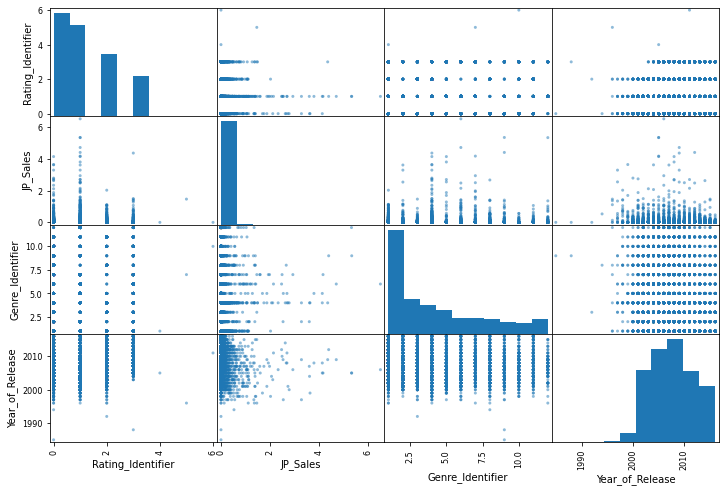

In [48]:
attributes = ["Rating_Identifier", "JP_Sales", "Genre_Identifier", "Year_of_Release"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

# JP_Sales are highest for 'E' rated games

Creating a Test Set

In [49]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

<AxesSubplot:>

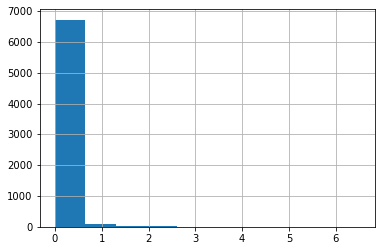

In [50]:
df["JP_Sales"].hist()

In [51]:
df["NA_Cat"] = pd.cut(df["NA_Sales"],
                               bins=[-0.01,0., 0.05, 0.12,0.2, 1., np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

In [52]:
df.tail()

,Name,Platform,Platform_Identifier,Year_of_Release,Genre,Genre_Identifier,Publisher,Publisher_Identifier,NA_Sales,EU_Sales,...,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Rating_Identifier,Sales_Category,Sales_Category_Identifier,NA_Cat
6861,E.T. The Extra-Terrestrial,GBA,6,2001,Action,1,NewKidCo,179,0.01,0.00,...,4,2.4,21,Fluid Studios,400,E,1,VERY LOW,0,2
6862,Mortal Kombat: Deadly Alliance,GBA,6,2002,Fighting,8,Midway Games,146,0.01,0.00,...,12,8.8,9,Criterion Games,280,M,2,VERY LOW,0,2
6863,Metal Gear Solid V: Ground Zeroes,PC,0,2014,Action,1,Konami Digital Entertainment,22,0.00,0.01,...,20,7.6,412,Kojima Productions,1070,M,2,VERY LOW,0,1
6864,Breach,PC,0,2011,Shooter,3,Destineer,193,0.01,0.00,...,12,5.8,43,Atomic Games,1136,T,0,VERY LOW,0,2
6865,STORM: Frontline Nation,PC,0,2011,Strategy,10,Unknown,111,0.00,0.01,...,12,7.2,13,SimBin,444,E10+,3,VERY LOW,0,1


In [53]:
newdf = df[["NA_Sales", "NA_Cat"]]
newdf

,NA_Sales,NA_Cat
0,15.68,6
1,15.61,6
2,11.28,6
3,13.96,6
4,14.44,6
...,...,...
6861,0.01,2
6862,0.01,2
6863,0.00,1
6864,0.01,2


In [54]:
newdf[newdf['NA_Cat'].isnull()]

,NA_Sales,NA_Cat


In [55]:
df["NA_Cat"].value_counts()

5    2264
3    1446
2    1065
4     959
6     589
1     543
Name: NA_Cat, dtype: int64

<AxesSubplot:>

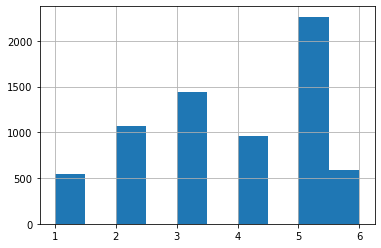

In [56]:
df["NA_Cat"].hist()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       6866 non-null   object  
 1   Platform                   6866 non-null   object  
 2   Platform_Identifier        6866 non-null   int64   
 3   Year_of_Release            6866 non-null   int64   
 4   Genre                      6866 non-null   object  
 5   Genre_Identifier           6866 non-null   int64   
 6   Publisher                  6866 non-null   object  
 7   Publisher_Identifier       6866 non-null   int64   
 8   NA_Sales                   6866 non-null   float64 
 9   EU_Sales                   6866 non-null   float64 
 10  JP_Sales                   6866 non-null   float64 
 11  Other_Sales                6866 non-null   float64 
 12  Global_Sales               6866 non-null   float64 
 13  Critic_Score               6866 n

In [58]:
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [59]:
for train_index, test_index in split.split(df, df["NA_Cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [60]:

strat_test_set["NA_Cat"].value_counts() / len(strat_test_set)

5    0.329694
3    0.210335
2    0.155022
4    0.139738
6    0.085881
1    0.079330
Name: NA_Cat, dtype: float64

In [61]:
df["NA_Cat"].value_counts() / len(df)

5    0.329741
3    0.210603
2    0.155112
4    0.139674
6    0.085785
1    0.079085
Name: NA_Cat, dtype: float64

In [62]:
def NA_Cat_proportions(data):
    return data["NA_Cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": NA_Cat_proportions(df),
    "Stratified": NA_Cat_proportions(strat_test_set),
    "Random": NA_Cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [63]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.079085,0.079330,0.076419,-3.371211,0.309886
2,0.155112,0.155022,0.149199,-3.811906,-0.058224
3,0.210603,0.210335,0.211063,0.218240,-0.127340
4,0.139674,0.139738,0.139010,-0.475082,0.045990
5,0.329741,0.329694,0.323872,-1.779836,-0.014080
6,0.085785,0.085881,0.100437,17.079500,0.111456


In [64]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("NA_Cat", axis=1, inplace=True)

### PERFORMANCE MEASURE

In [65]:
Features = ['Platform_Identifier', 'Year_of_Release', 'Genre_Identifier', 'Publisher_Identifier']

In [66]:
X, y = df[Features], df["NA_Cat"]
X.shape

(6866, 4)

In [67]:
y.shape

(6866,)

In [68]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(solver='sag', max_iter=3000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

#https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

##### CONFUSION MATRIX

[[ 52   1   0   0  52   0]
 [ 18   8   0   0 179   0]
 [ 20   0   0   0 270   0]
 [  6   2   0   0 183   0]
 [ 12   5   0   0 428   0]
 [  4   1   0   0 133   0]]


C:\Users\ammar\AppData\Local\Temp\ipykernel_9692\4132617648.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ammar\AppData\Local\Temp\ipykernel_9692\4132617648.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


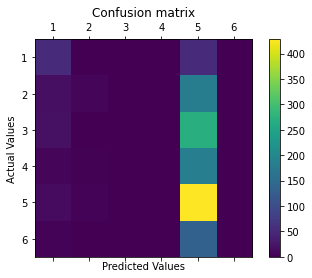

In [70]:
#Construct the Confusion Matrix
# labels = ['0', '0-0.05', '0.05-0.12','0.12-0.2','0.2-1','1 onwards']
labels = [1, 2, 3, 4, 5, 6]
cm = confusion_matrix(y_test,pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
fig.colorbar(cax)

### Precision & Recall

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall_score(y_test, pred, average="micro")

0.3551673944687045